In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/reglab1.txt", sep="\t")
df

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102
...,...,...,...
195,2.917468,0.745790,0.073874
196,4.813905,0.474947,0.582424
197,6.419296,0.773870,0.636785
198,4.231917,0.049090,0.994537


In [3]:
df.describe()

,z,x,y
count,200.000000,200.000000,200.000000
mean,4.526593,0.505099,0.500915
std,1.896627,0.275199,0.297885
min,1.279172,0.012889,0.007156
25%,2.952748,0.267437,0.212382
50%,4.309908,0.509381,0.505285
75%,5.777935,0.732546,0.763352
max,9.569435,0.995119,0.994609


In [16]:
import matplotlib.pyplot as plt

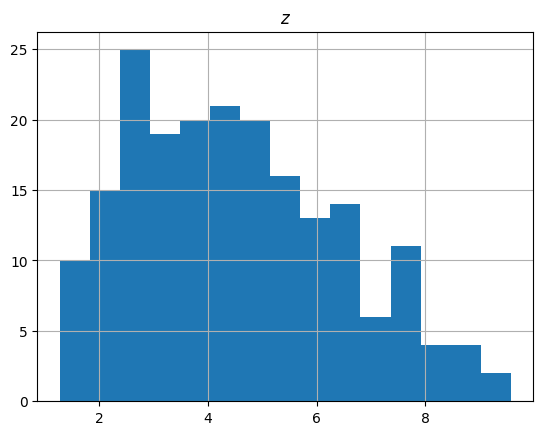

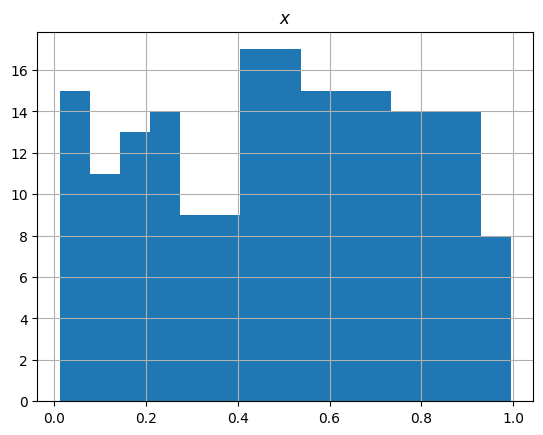

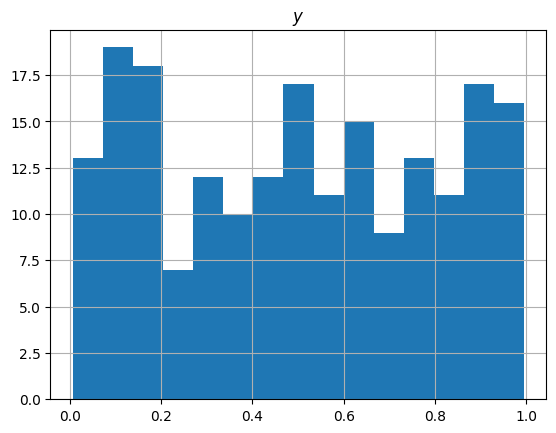

In [19]:
for col in df.columns:
    df[col].hist(bins=15)
    plt.title(f"${col}$")
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_df, test_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
)

In [6]:
from tqdm import tqdm

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
for target_col in tqdm(df.columns):

    X_train = train_df.drop(target_col, axis=1)
    X_test = test_df.drop(target_col, axis=1)
    y_train = train_df[target_col]
    y_test = test_df[target_col]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(target_col)
    print(
        r2_score(y_true=y_test, y_pred=y_pred),
        mean_squared_error(y_true=y_test, y_pred=y_pred),
    )

    print(list(zip(model.coef_, X_train.columns)) + [(model.intercept_, "bias")])
    print()

100%|████████████████████████████████████████████████████| 3/3 [00:00<00:00, 255.08it/s]

z
0.966750533806433 0.12282534889074943
[(np.float64(4.131295221893194), 'x'), (np.float64(4.920746570906584), 'y'), (np.float64(-0.018397884222508765), 'bias')]

x
0.9206324974622901 0.006942908128829413
[(np.float64(0.2219217026228509), 'z'), (np.float64(-1.089889889165696), 'y'), (np.float64(0.04414830532156028), 'bias')]

y
0.9470179480230259 0.004674798356333443
[(np.float64(0.19344123976542393), 'z'), (np.float64(-0.7976036763729076), 'x'), (np.float64(0.027059033817614764), 'bias')]



In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [11]:
train_df, test_df = train_test_split(
    scalled_df,
    test_size=0.3,
    random_state=42,
)

In [20]:
for target_col in tqdm(df.columns):

    X_train = train_df.drop(target_col, axis=1)
    X_test = test_df.drop(target_col, axis=1)
    y_train = train_df[target_col]
    y_test = test_df[target_col]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(target_col)
    print(
        round(r2_score(y_true=y_test, y_pred=y_pred), 6),
        round(mean_squared_error(y_true=y_test, y_pred=y_pred), 6),
    )

    print(list(zip(model.coef_, X_train.columns)) + [(model.intercept_, "bias")])
    print()

100%|████████████████████████████████████████████████████| 3/3 [00:00<00:00, 303.43it/s]

z
0.966751 0.034316
[(np.float64(0.5994470382828847), 'x'), (np.float64(0.7728556585940892), 'y'), (np.float64(0.003486524968774267), 'bias')]

x
0.920632 0.092135
[(np.float64(1.5294496613185846), 'z'), (np.float64(-1.179737618691181), 'y'), (np.float64(-0.008536031424368744), 'bias')]

y
0.947018 0.052947
[(np.float64(1.2316340142727236), 'z'), (np.float64(-0.7368589156329813), 'x'), (np.float64(-0.0036839476590036727), 'bias')]

